In [1]:
import explore
import pandas as pd
import numpy as np
import env
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.get_zillow()
df = wrangle.prep_zillow(df)
col_list = ['bathroomcnt', 'bedroomcnt', 'sqft', 'lotsizesquarefeet', 'yearbuilt', 'tax_value']
df = wrangle.remove_outliers(df, 1.5, col_list)
train, validate, test = wrangle.my_split(df)

In [3]:
train.shape, validate.shape, test.shape

((27696, 14), (9233, 14), (9233, 14))

In [4]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,sqft,county,fireplacecnt,garagecarcnt,hashottuborspa,lotsizesquarefeet,yearbuilt,poolcnt,logerror,tract,tax_value
41050,12447572,1.0,3.0,1120.0,Los Angelos,0.0,0.0,0.0,5940.0,1947.0,0.0,0.006195,5702,254647.0
639,12796007,1.0,3.0,1513.0,Los Angelos,0.0,0.0,0.0,6324.0,1950.0,0.0,0.010688,5019,385686.0
9551,17096073,2.5,4.0,1943.0,Ventura,1.0,2.0,0.0,3136.0,2012.0,0.0,0.019051,13,461740.0
17505,10829225,2.0,3.0,1316.0,Los Angelos,0.0,0.0,0.0,6129.0,1949.0,0.0,0.000445,1278,381638.0
49962,12581046,1.0,2.0,775.0,Los Angelos,0.0,0.0,0.0,5885.0,1943.0,0.0,-0.064025,5437,48199.0


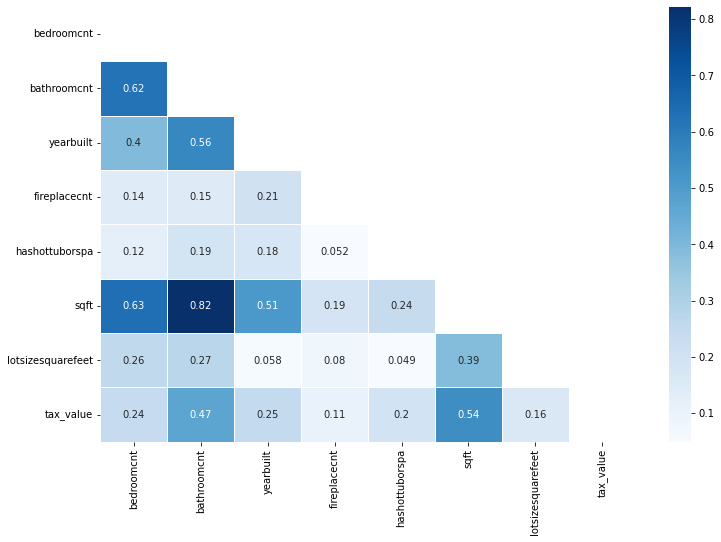

In [5]:
#explore.plot_variable_pairs(train)
cols = ['bedroomcnt', 'bathroomcnt',  'yearbuilt', 'fireplacecnt', 'hashottuborspa',
            'sqft', 'lotsizesquarefeet', 'tax_value']
    
    
# make correlation plot
df_corr = train[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap='Blues', annot = True, mask= np.triu(df_corr), linewidth=.5)
plt.show()

### sqft is highly correlated with br and bathroom count - may not want to use them all for modeling

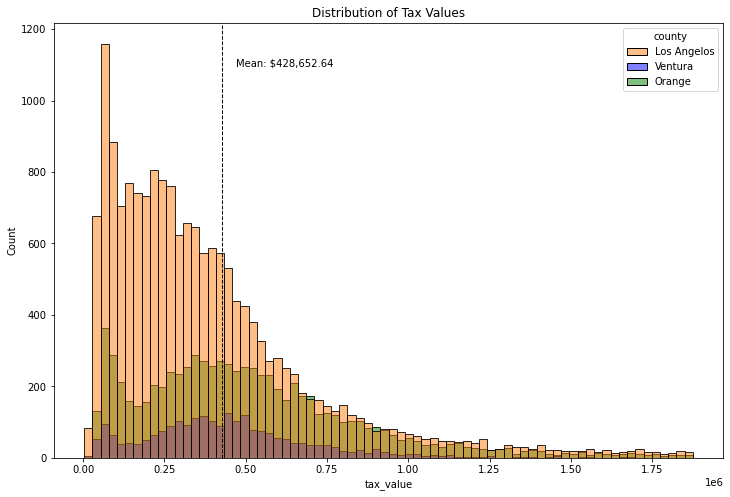

In [16]:
# Plot Distribution of target variable
plt.figure(figsize=(12,8))
plt.title('Distribution of Tax Values')
sns.histplot(data=train, x='tax_value', hue='county', palette=["C1", "blue", "green"])
plt.axvline(train.tax_value.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(train.tax_value.mean()*1.1, max_ylim*0.9, 'Mean: ${:,.2f}'.format(train.tax_value.mean()))
plt.show()

# data is positively (right) skewed.  Will want to transform prior to modeling


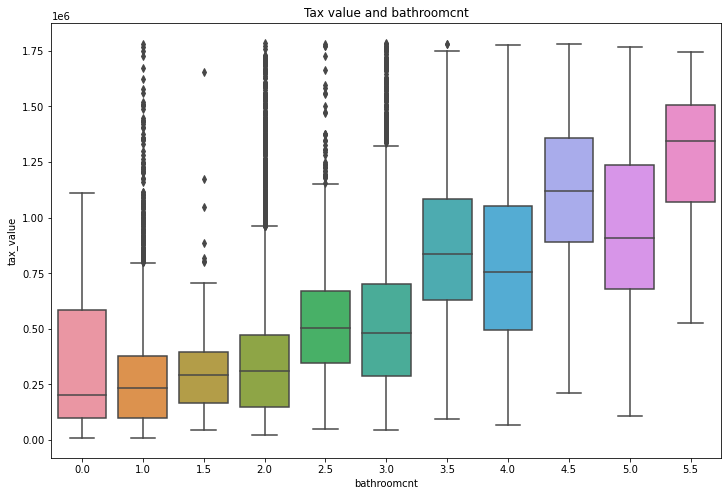

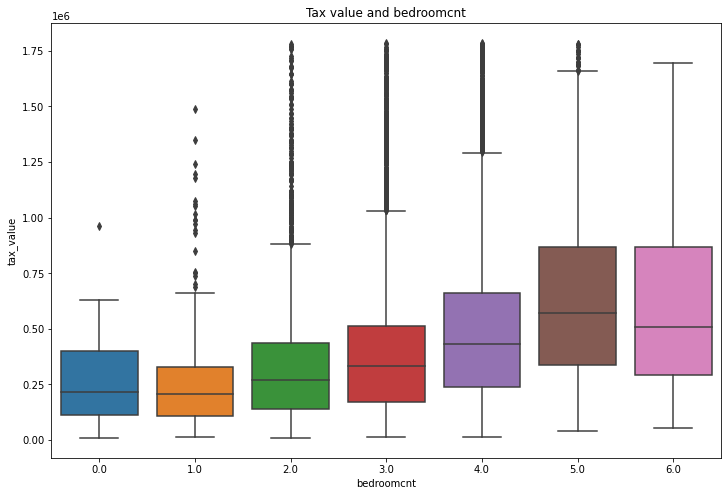

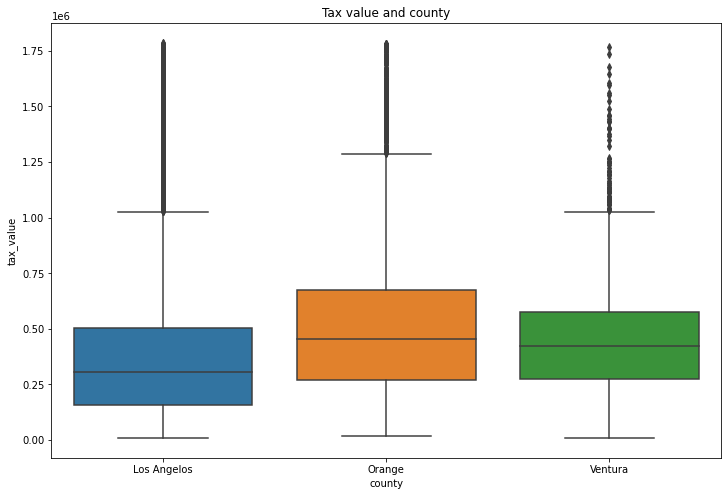

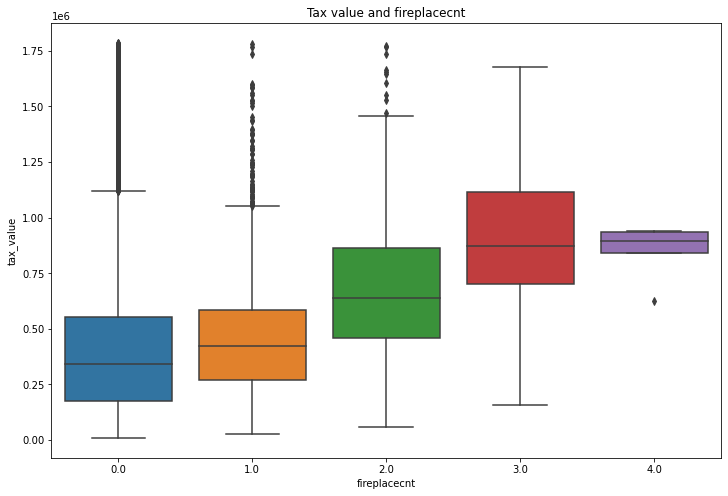

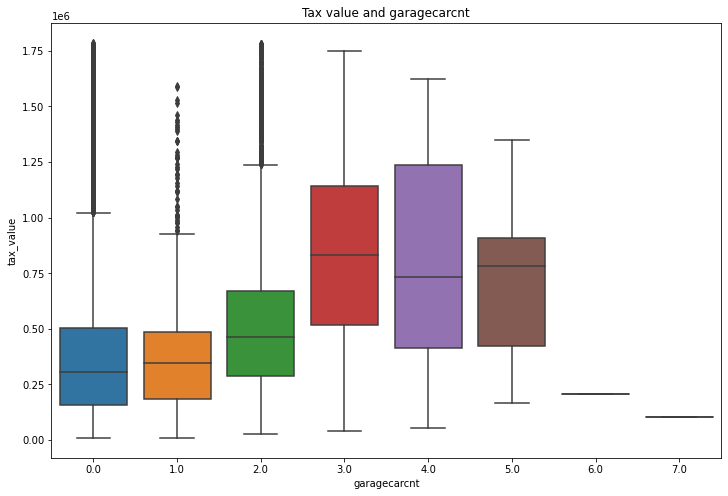

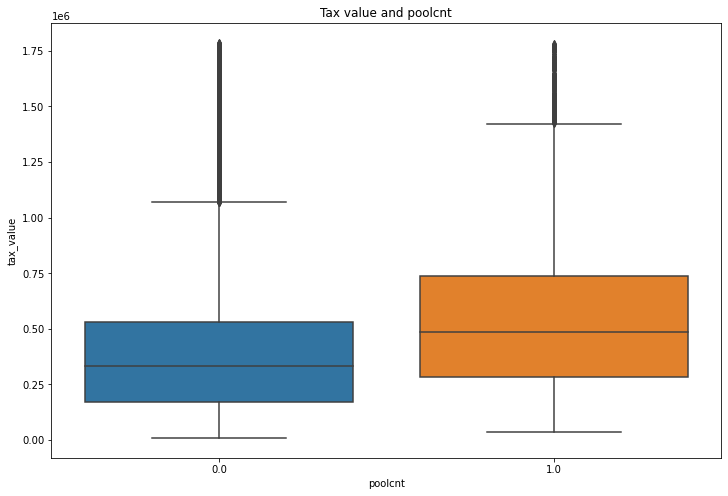

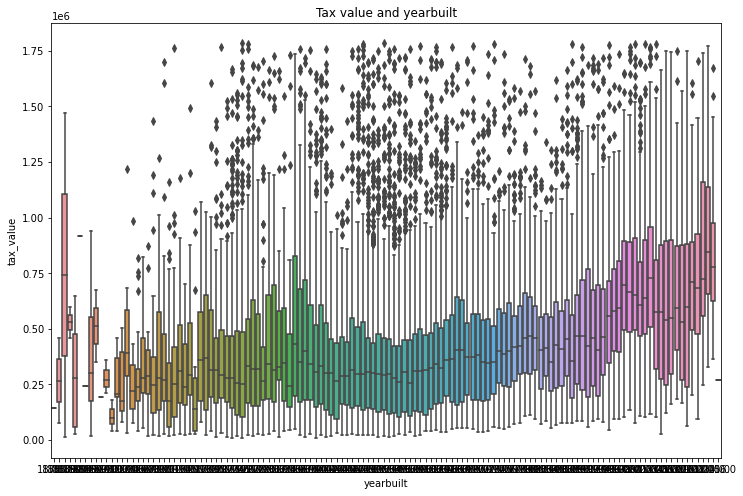

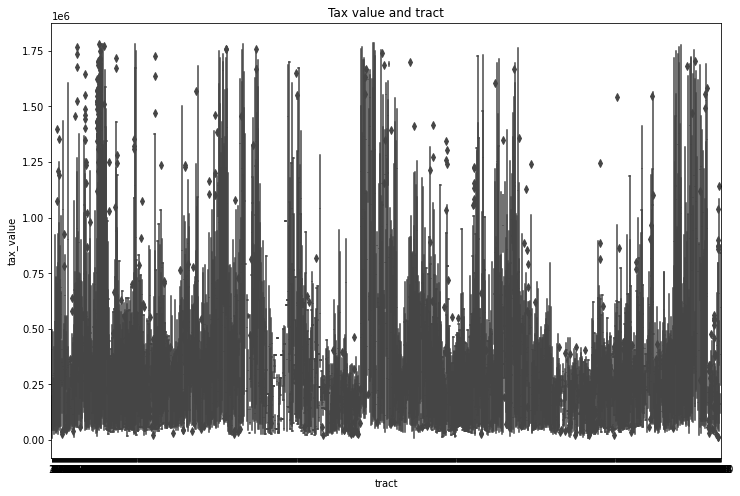

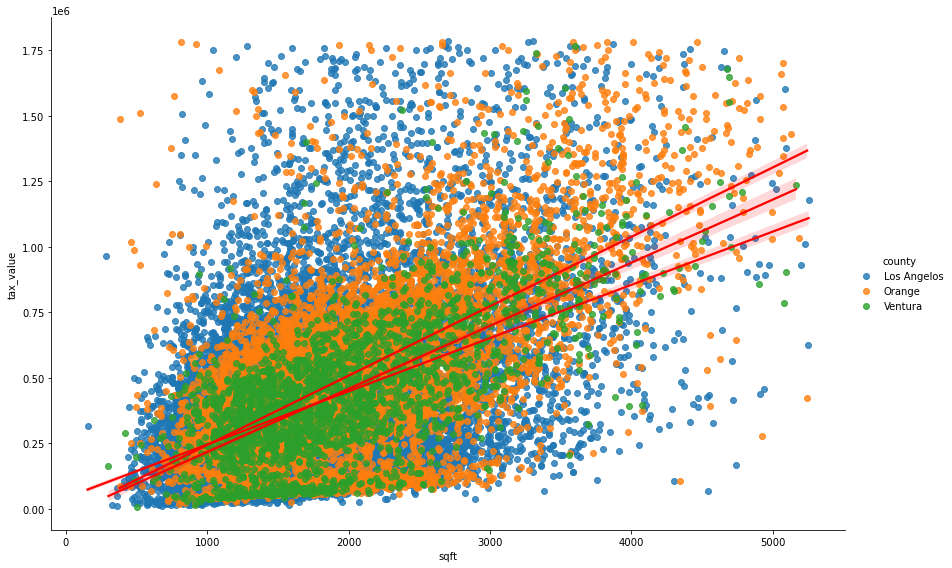

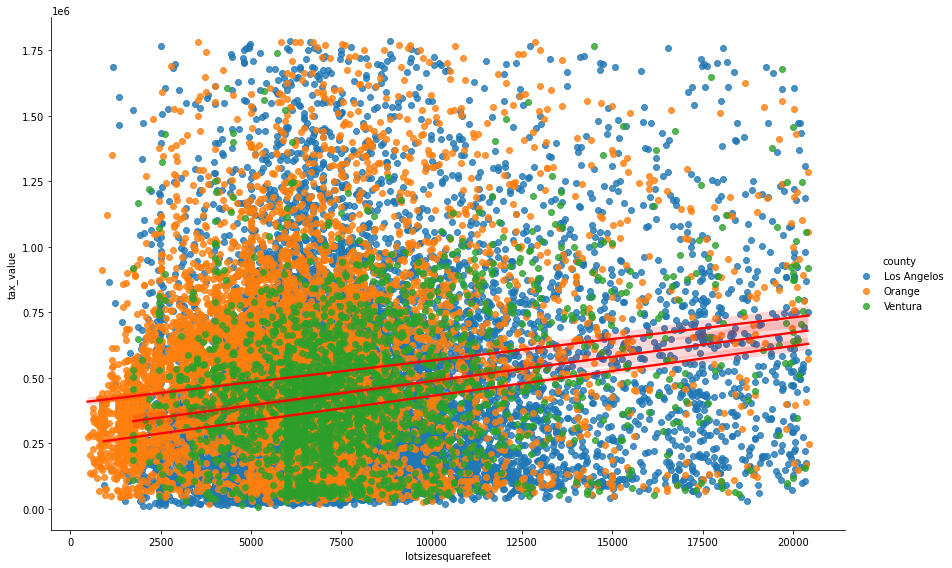

In [22]:
cat_vars = ['bathroomcnt', 'bedroomcnt', 'county', 'fireplacecnt', 'garagecarcnt', 
            'poolcnt', 'yearbuilt', 'tract']
num_vars = ['sqft', 'lotsizesquarefeet']

for cat in cat_vars:
    plt.figure(figsize=(12,8))
    plt.title(f'Tax value and {cat}')
    sns.boxplot(data=train, y='tax_value', x=cat)
    plt.show()
    
for num in num_vars:
    sns.lmplot(data=train, y='tax_value', x=num, height=8, aspect=12/8, hue='county',line_kws={'color':'red'})
    plt.show()

In [18]:
o = df[df.county == 'Orange']
l = df[df.county == 'Los Angelos']
v = df[df.county == 'Ventura']

In [19]:
v.hashottuborspa.value_counts(), v.poolcnt.value_counts()

(0.0    3870
 Name: hashottuborspa, dtype: int64,
 0.0    3206
 1.0     664
 Name: poolcnt, dtype: int64)

In [20]:
o.hashottuborspa.value_counts(), o.poolcnt.value_counts()

(0.0    11728
 1.0     1190
 Name: hashottuborspa, dtype: int64,
 0.0    10096
 1.0     2822
 Name: poolcnt, dtype: int64)

In [21]:
l.hashottuborspa.value_counts(), l.poolcnt.value_counts()

(0.0    28983
 Name: hashottuborspa, dtype: int64,
 0.0    23817
 1.0     5166
 Name: poolcnt, dtype: int64)

## Orange county is the only county with counts for hot tub/spa.  Will need to drop that column for final notebook

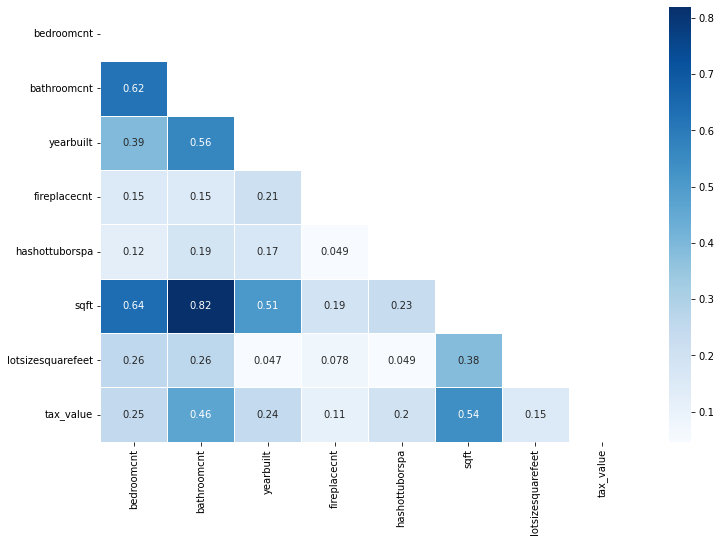

In [4]:
# test correlation plot function
explore.corr_plot(train)

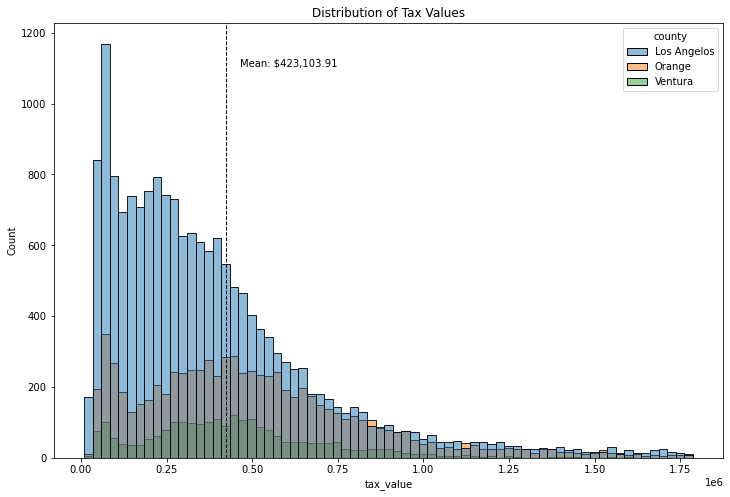

In [4]:
# test target variable distribution plot
explore.target_dist(train)